# This is a stock price predictor for any stock.
## By Niam Bashambu

In [68]:
#doing imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from pandas_datareader import data
import time


In [69]:
tickers = 'NVDA'

start_date = '2020-01-01'
end_date = '2025-01-01'

stock_data = yf.download(tickers, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [70]:
#Print data
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000
2020-01-03,5.877111,5.920927,5.828066,5.852962,205384000
2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
2020-01-07,5.973209,6.019017,5.885079,5.930140,314856000
2020-01-08,5.984413,6.025740,5.928896,5.968977,277108000
2020-01-09,6.050136,6.122582,5.996362,6.070800,255112000
2020-01-10,6.082499,6.187808,6.068309,6.157435,316296000
2020-01-13,6.273201,6.298346,6.142997,6.165652,319840000


In [71]:
stock_data.reset_index(inplace=True)
stock_data.dropna(inplace=True)
stock_data

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000
1,2020-01-03,5.877111,5.920927,5.828066,5.852962,205384000
2,2020-01-06,5.901758,5.906986,5.757613,5.783753,262636000
3,2020-01-07,5.973209,6.019017,5.885079,5.930140,314856000
4,2020-01-08,5.984413,6.025740,5.928896,5.968977,277108000
...,...,...,...,...,...,...
1253,2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
1254,2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
1255,2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [72]:
stock_data.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2022-07-01 15:39:46.645468928,38.445948,39.156301,37.671665,38.450352,4.468056e+08
min,2020-01-02 00:00:00,4.892426,5.229715,4.500833,4.984595,9.788400e+07
25%,2021-04-02 00:00:00,13.573232,13.824407,13.338219,13.605263,3.084230e+08
50%,2022-06-30 12:00:00,21.237933,21.744668,20.824599,21.172297,4.209180e+08
75%,2023-10-01 06:00:00,45.626475,46.206088,44.970615,45.750924,5.467242e+08
max,2024-12-31 00:00:00,148.869751,152.879470,146.249911,149.339720,1.543911e+09
std,NaN,38.233881,38.944453,37.489330,38.295294,1.877132e+08


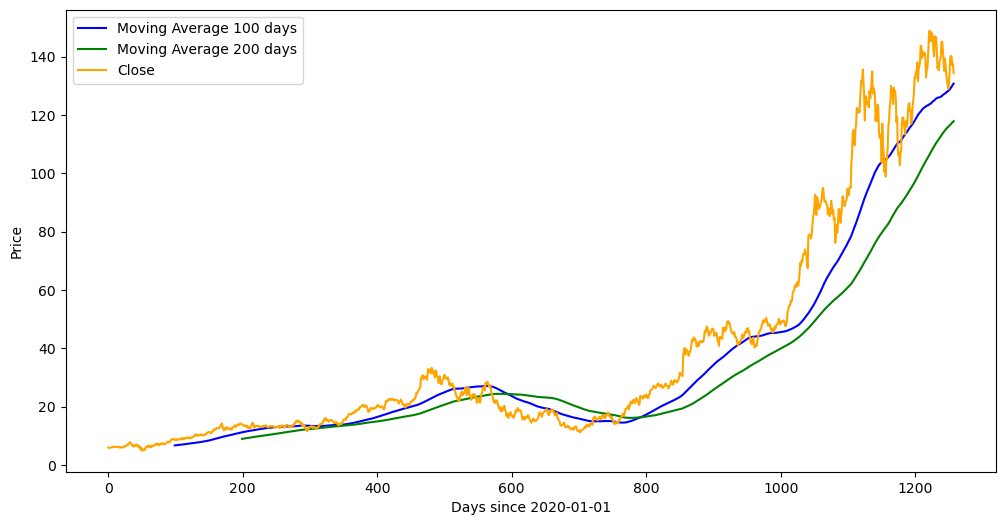

In [87]:
#Plotting the data and the moving averages
avg1 = stock_data['Close'].rolling(100).mean()
avg2 = stock_data['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(avg1, 'blue', label='Moving Average 100 days')
plt.plot(avg2, 'green', label='Moving Average 200 days')
plt.plot(stock_data['Close'], 'orange', label='Close')
plt.legend(loc='upper left')
plt.xlabel(f'Days since {start_date}')
plt.ylabel('Price')
plt.show()

In [74]:
train, test = train_test_split(stock_data['Close'], test_size=0.2, shuffle=False)



In [75]:
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train.values.reshape(-1,1))


In [76]:
x = []
y = []

for i in range(100, train_scaled.shape[0]):
    x.append(train_scaled[i-100:i])
    y.append(train_scaled[i, 0])
    
x, y = np.array(x), np.array(y)

In [77]:
model = Sequential()

model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/Users/niambashambu/anaconda3/envs/ds/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [79]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.1213
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0176
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0114
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0096
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0094
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0085
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0097
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0089
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0071
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0088
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0072
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0071
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0077
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0064
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.00

In [80]:

past_100_days = train.tail(100)
data_test = pd.concat((past_100_days, test), ignore_index=True)

data_test_scaled = scaler.fit_transform(data_test.values.reshape(-1,1))

In [81]:
x = []
y = []

for i in range(100, data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i, 0])
    
x, y = np.array(x), np.array(y)

In [82]:
y_predict = model.predict(x)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [83]:
scale = 1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

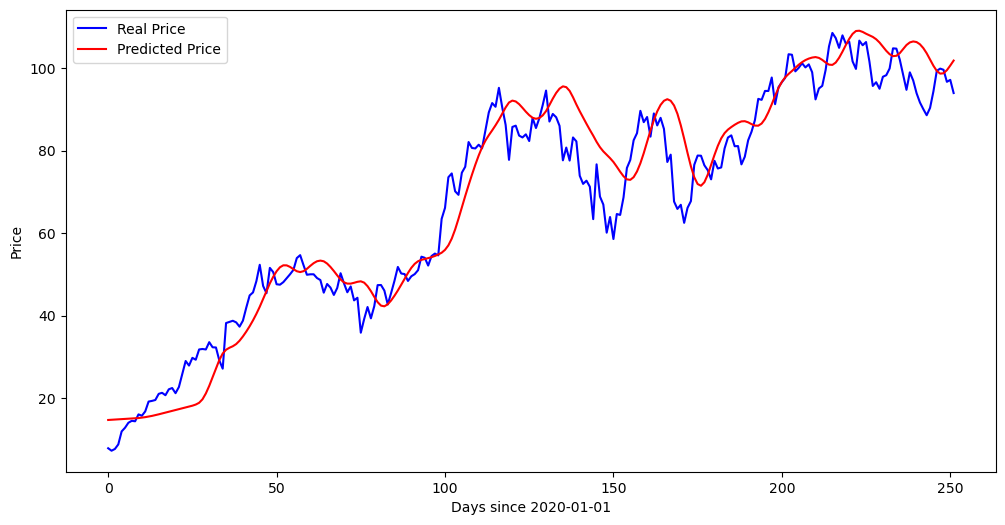

In [88]:
plt.figure(figsize=(12,6))
plt.plot(y, 'b', label='Real Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel(f'Days since {start_date}')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()